This is a neural network model for the regression task that adds additional non linearity to the funcion so it can better capture the underlying relationship betwwen inputs and output and overcome the problems in simple linear model without any activation function

In [2]:
import torch 
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Concrete_Data.csv')

In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.shape, y.shape

((1030, 8), (1030,))

In [5]:
x_scaled = StandardScaler().fit_transform(x)

In [6]:
x_tensor = torch.tensor(x_scaled, dtype=torch.float32, )
y_tensor = torch.tensor(y, dtype= torch.float32,).view(-1, 1)

In [7]:
num_samples = x_tensor.shape[0]
num_samples
index = torch.randperm(num_samples)
train_size = int(0.8*num_samples)
train_indices = index[:train_size]
test_indices = index[train_size:]
x_train = x_tensor[train_indices]
y_train = y_tensor[train_indices]
x_test = x_tensor[test_indices]
y_test = y_tensor[test_indices]

In [8]:
# adjust the shaped and then try for other datasets as in this i have hardcoded.
class ConcreteModel(nn.Module):
    def __init__(self ):
        super(ConcreteModel, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32,16)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(16,1)

    def forward(self,x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
    

In [9]:
model = ConcreteModel()
model

ConcreteModel(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

In [10]:
epochs = 1000
learning_rate = 0.01
train_losses = []

In [11]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [12]:
for epoch in range(epochs):
    #forward pass
    model.train()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # store training loss
    train_losses.append(loss.item())

    
    #print training loss
    if (epoch+1) %50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    

Epoch [50/1000], Loss: 177.8610
Epoch [100/1000], Loss: 120.0852
Epoch [150/1000], Loss: 106.6406
Epoch [200/1000], Loss: 100.7648
Epoch [250/1000], Loss: 98.3019
Epoch [300/1000], Loss: 96.1365
Epoch [350/1000], Loss: 87.5865
Epoch [400/1000], Loss: 71.4861
Epoch [450/1000], Loss: 60.5149
Epoch [500/1000], Loss: 49.8207
Epoch [550/1000], Loss: 41.4419
Epoch [600/1000], Loss: 37.9130
Epoch [650/1000], Loss: 35.0886
Epoch [700/1000], Loss: 33.3368
Epoch [750/1000], Loss: 32.1593
Epoch [800/1000], Loss: 31.0631
Epoch [850/1000], Loss: 29.9627
Epoch [900/1000], Loss: 29.1946
Epoch [950/1000], Loss: 28.5484
Epoch [1000/1000], Loss: 27.9832


In [13]:
model.eval()
with torch.no_grad():
    # MSELoss
    y_test_pred = model(x_test)
    test_loss = loss_fn(y_test_pred, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")
    # RMSELoss
    rmse = torch.sqrt(test_loss)
    print(f"Test RMSE: {rmse.item():.4f}")

Test Loss: 47.1102
Test RMSE: 6.8637


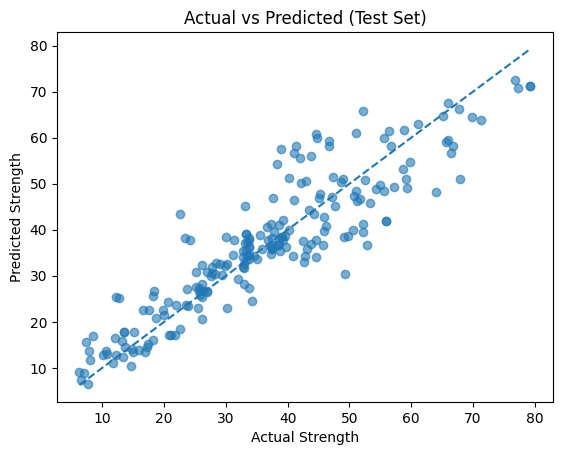

In [14]:
plt.scatter(y_test.numpy(), y_test_pred.numpy(), alpha=0.6)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs Predicted (Test Set)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.show()
